# OMNIA Timeseries API - Python SDK examples

In [1]:
%matplotlib notebook

## Import Omnia Client from SDK

In [2]:
from omnia_sdk import OmniaClient
client = OmniaClient()

## List available time series

In [4]:
# only the top 3 for readability
print(client.time_series.list(limit=3))

[
  {
    "id": "bdc2e4aa-83de-458b-b989-675fa4e58aac",
    "external_id": "ONO-IMS-7380",
    "asset_id": "KRIS",
    "name": "KRI.94WT5231B/Y/PRIM",
    "description": "Lastcelle, 94MK201",
    "step": false,
    "unit": "mA",
    "created_time": "2019-10-14T09:46:40.379000Z",
    "changed_time": "2019-10-14T09:46:41.200000Z"
  },
  {
    "id": "b51e1723-c25b-4847-825e-2da26409ff3c",
    "external_id": "ONO-IMS-7358",
    "asset_id": "KRIS",
    "name": "KRI.94WT5434B/Y/PRIM",
    "description": "Lastcelle, 94MK404",
    "step": false,
    "unit": "mA",
    "created_time": "2019-10-14T09:46:46.362000Z",
    "changed_time": "2019-10-14T09:46:49.606000Z"
  },
  {
    "id": "63aa724b-85e2-4bac-a819-da1206108fb1",
    "external_id": "ONO-IMS-136222",
    "asset_id": "KRIS",
    "name": "KRI.94XI0006/Y/PRIM",
    "description": "XG_ROT",
    "step": false,
    "created_time": "2019-10-14T09:46:58.671000Z",
    "changed_time": "2019-10-14T09:46:59.674000Z"
  }
]


In [7]:
# you can also view it as a pandas DataFrame
df = client.time_series.list(limit=10).to_pandas()
df.head()

,id,external_id,asset_id,name,description,step,unit,created_time,changed_time
0,bdc2e4aa-83de-458b-b989-675fa4e58aac,ONO-IMS-7380,KRIS,KRI.94WT5231B/Y/PRIM,"Lastcelle, 94MK201",False,mA,2019-10-14 09:46:40.379000+00:00,2019-10-14 09:46:41.200000+00:00
1,b51e1723-c25b-4847-825e-2da26409ff3c,ONO-IMS-7358,KRIS,KRI.94WT5434B/Y/PRIM,"Lastcelle, 94MK404",False,mA,2019-10-14 09:46:46.362000+00:00,2019-10-14 09:46:49.606000+00:00
2,63aa724b-85e2-4bac-a819-da1206108fb1,ONO-IMS-136222,KRIS,KRI.94XI0006/Y/PRIM,XG_ROT,False,NaN,2019-10-14 09:46:58.671000+00:00,2019-10-14 09:46:59.674000+00:00
3,d6f5e549-5766-4275-8024-f01084771dc1,ONO-IMS-7383,KRIS,KRI.94WT5134A/Y/PRIM,"Lastcelle, 94MK104",False,mA,2019-10-14 09:46:28.266000+00:00,2019-10-14 09:46:30.212000+00:00
4,16b569a6-e31a-4da6-b4f8-0b8354c33d2b,ONO-IMS-7361,KRIS,KRI.94WT5433A/Y/PRIM,"Lastcelle, 94MK403",False,mA,2019-10-14 09:46:37.249000+00:00,2019-10-14 09:46:38.101000+00:00


## Retrieve time series by ID

In [8]:
# You find the ID in the list above
ts = client.time_series.retrieve(id='bdc2e4aa-83de-458b-b989-675fa4e58aac')

# Take a look at the attributes
df = ts.to_pandas()
df.head()

,value
id,bdc2e4aa-83de-458b-b989-675fa4e58aac
external_id,ONO-IMS-7380
asset_id,KRIS
name,KRI.94WT5231B/Y/PRIM
description,"Lastcelle, 94MK201"


## Plot the time series

<IPython.core.display.Javascript object>


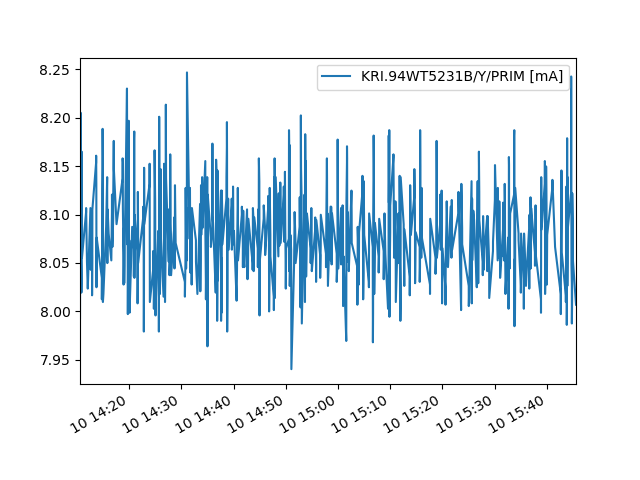

In [10]:
# By default plots the last 24 hour (note that some data maybe be missing)
ts.plot()

<IPython.core.display.Javascript object>


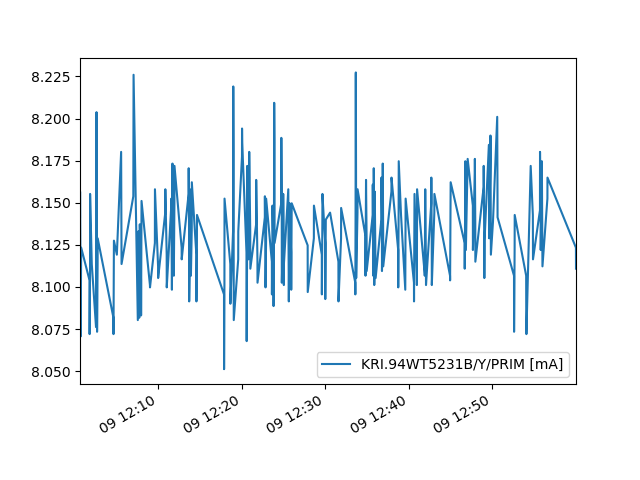

In [17]:
# You can also select the time window using ISO RFC 3339 formatted date time strings
# Say between 12 and 13 PM November 9th
from datetime import datetime, timedelta
start = datetime(2019, 11, 9, 12)
end = start + timedelta(hours=1)
ts.plot(start=start.isoformat(), end=end.isoformat())

## Get the data points of the time series

In [19]:
# same time window
dps = ts.data(start=start.isoformat(), end=end.isoformat())
dps.to_pandas().head()

,KRI.94WT5231B/Y/PRIM [mA]
2019-11-09 12:00:39.262000+00:00,8.141382
2019-11-09 12:00:39.762000+00:00,8.156641
2019-11-09 12:00:43.012000+00:00,8.106702
2019-11-09 12:00:43.762000+00:00,8.070636
2019-11-09 12:00:47.012000+00:00,8.115026


<IPython.core.display.Javascript object>


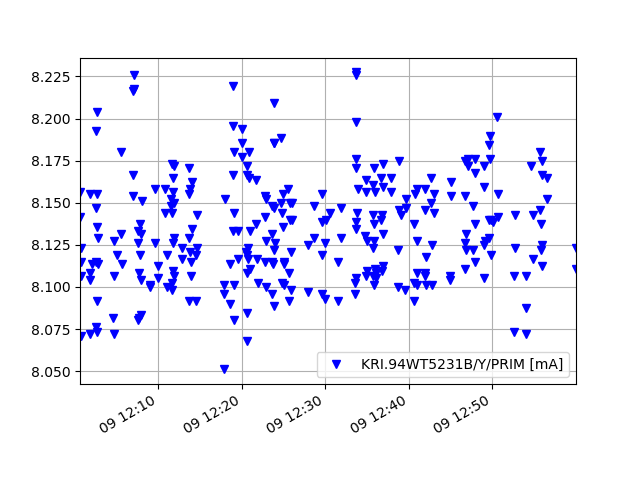

In [21]:
# you can also plot directly from the list of data points and customize the plot
dps.plot(grid=True, style=["vb"])